initial loss 0.69314718056
newloss 0.485303034113
newtestloss 0.481339195928


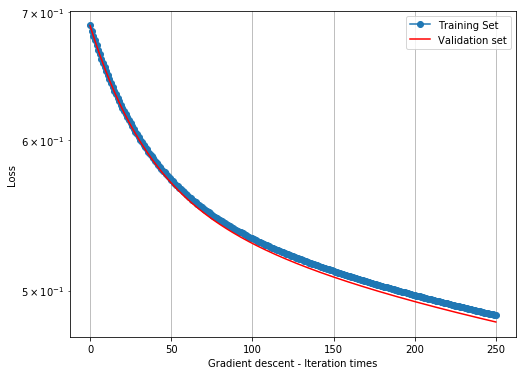

In [2]:
import numpy as np
from numpy import *
import sklearn 
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.linalg import det
from numpy.linalg import inv
from numpy import mat
from numpy import random
import pandas as pd
from sklearn.externals.joblib import Memory
import random
from numpy import genfromtxt
import math

def get_data():
    data=load_svmlight_file(r"D:\a9a.txt")
    return data[0],data[1]
def get_testdata():
    testdata=load_svmlight_file(r"D:\a9atest.txt")
    return testdata[0],testdata[1]
def add_bias(matrix):
    bias=[]
    for i in range(matrix.shape[0]):
        bias.append(1)
    matrix=np.column_stack((matrix,bias))
    return matrix
def computerloss(x,y,w):
    #theta= np.ndarray.tolist(theta)
    losssum=0
    m=x.shape[0]
    #n=x.shape[1]
    for i in range(m):
        if(y[i]==-1):
            losssum+=np.log(1-likehood(x,w,i))
        else:
            losssum+=(np.log(likehood(x,w,i)))
    loss=-losssum/m
    #返回一个正数
    return loss
def likehood(X,w,i):
    h_result=0
    #(w.T*matrix(X[i]).T)
    h_result=1/(1+np.exp(-ele(w.T*matrix(X[i]).T)))
    #返回一个数
    return ele(h_result)
def grand_w(X,y,w,i):
    d=likehood(X,w,i)
    #if yi=-1,transform yi=0
    if(y[i]==-1):
        return likehood(X,w,i)*(matrix(X[i]).T)
    else:
        return-y[i]*matrix(X[i]).T+likehood(X,w,i)*(matrix(X[i]).T)
def get_gradient(X,y,w):
    n=X.shape[1]
    gradient = mat(zeros((n,1)))
    for i in range(n):
         gradient+=grand_w(X,y,w,i)
    #返回一个矩阵
    return gradient
#当矩阵是一个数时，取该数返回
def ele(t):
    return np.array(t)[0]

X_train,y_train=get_data()
m_train=X_train.shape[0]
X_test,y_test=get_testdata()
X_test=X_test.todense()
#test的x少一维，加0
X_test=add_bias(X_test)
X_train = X_train.toarray()
y_train = y_train
y_test = y_test
n = X_train.shape[1]
m=X_train.shape[0]
w = mat(zeros((n,1)))

SGD_loss=[]
SGD_loss_random=[]
SGD_loss_gauss=[]
def MiniBatchSGD(option):
    n = X_train.shape[1]
    #初始化参数
    train_loss=[]
    test_loss=[]
    cnt=0
    alpha=0.01
    if (option==0):
        w = mat(zeros((n,1)))
    elif option == 1:
        w=mat(np.random.rand(n,1))
    else:
        w = mat(np.random.randn(n,1))
   #计算loss函数
    loss=computerloss(X_train,y_train,w)
    print("initial loss",loss)
    #update w
    while True:
        w+=alpha*(-get_gradient(X_train,y_train,w)/n);
    #计算loss
        newloss=computerloss(X_train,y_train,w)
        newtestloss=computerloss(X_test,y_test,w)
        if abs(loss - newloss) > 0.00001:
            loss = newloss
        else:
            break
        train_loss.append(loss)
        test_loss.append(newtestloss)
        cnt += 1
# 当迭代次数大于150时也停止
        if cnt > 250:
            break
    print("newloss",newloss)
    print("newtestloss",newtestloss)
    plt.figure(figsize=(8, 6))
    plt.yscale('log')
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), test_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
    return test_loss
# initalizing zeros, random numbers or gaussian distribution.
SGD_loss=MiniBatchSGD(0)  

initial loss 5.00309859069
newloss 0.666830921694
newtestloss 0.696441287139


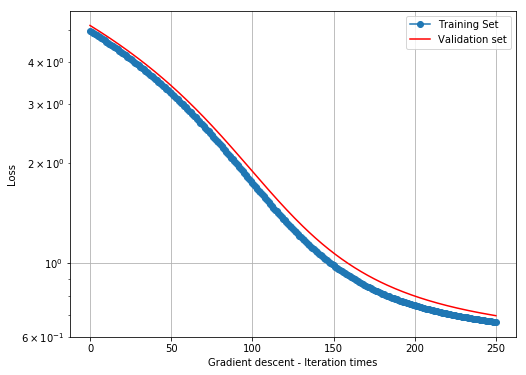

In [2]:
SGD_loss_random=MiniBatchSGD(1)#random numbers distribution.

initial loss 2.45985515674
newloss 1.09746217891
newtestloss 1.24460583381


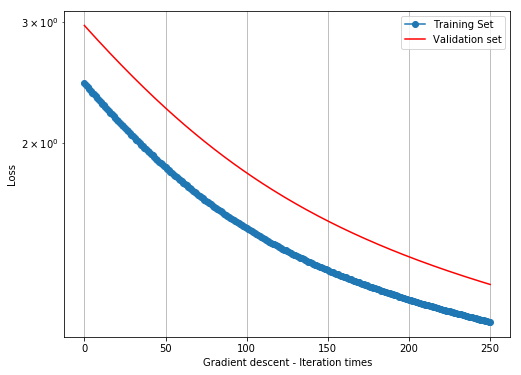

In [3]:
SGD_loss_gauss=MiniBatchSGD(2)#gaussian distribution.

loss 0.69314718056
newloss 0.384496397031
newtestloss 0.379795491741


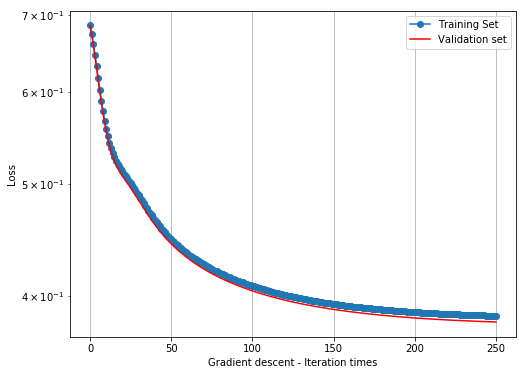

In [3]:
def NAG_grad(X_train,y_train,w,Va):
    n=X_train.shape[1]
    V_head=mat(zeros((n,1)))
    gradient = mat(zeros((n,1)))
    gradient=get_gradient(X_train,y_train,w)/n
    #w+=alpha*(-gradient/n);
    V_head=Va
    gamma=0.9
    alpha= 0.01
    Va=gamma*Va-alpha*gradient
    w+=(-gamma*V_head+(1+gamma)*Va);
    return w,Va
NAG_loss=[]
NAG_cnt=0
def NAG(option):
    if (option==0):
        w = mat(zeros((n,1)))
    elif option == 1:
        w=mat(np.random.rand(n,1))
    else:
        w = mat(np.random.randn(n,1))
    Va=mat(zeros((n,1)))
    loss=0
    loss=computerloss(X_train,y_train,w)
    print("loss",loss)
    #初始化参数
   # maxIterations=150
    #print("thete",theta.shape)
    train_loss=[]
    test_loss=[]
    cnt=0
    while True:
        w,Va=NAG_grad(X_train,y_train,w,Va)
        #print("thete",theta.shape)
        newloss=computerloss(X_train,y_train,w)
        newtestloss=computerloss(X_test,y_test,w)
        if abs(loss - newloss) > 0.00001:
            loss = newloss
        else:
            break
        train_loss.append(loss)
        test_loss.append(newtestloss)
        cnt += 1
# 当迭代次数大于250时也停止
        if cnt > 250:
            break
    #计算loss函数
    #testloss=computerloss(X_test,y_test,theta)
   # print("test_loss",X_train[1,:].type)
    NAG_cnt=cnt
    print("newloss",newloss)
    print("newtestloss",newtestloss)
    plt.figure(figsize=(8, 6))
    plt.yscale('log')
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), test_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
    return test_loss,NAG_cnt
NAG_loss,NAG_cnt=NAG(0)## initalizing zeros

loss 0.69314718056
newloss 0.506478699118
newtestloss 0.501020086841


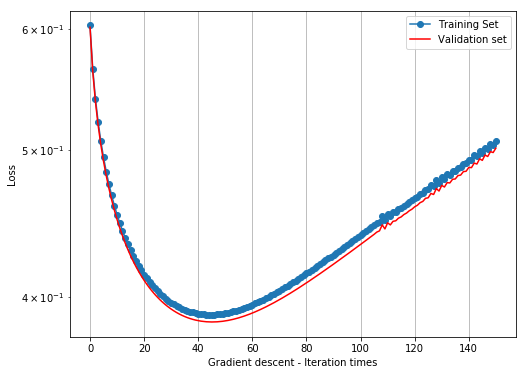

In [4]:
def RMSProp_grad(X_train,y_train,w,cache):
    n=123
    gradient_aver=mat(zeros((n,1)))
    alpha=0.01
    cnt=0
    decay_rate=0.9
    eps=math.pow(10, -8 )
        #grad=computer_minibatch_Grad(X_train,y_train,theta,grad,batch)
    #开始更新theta
    gradient_aver=get_gradient(X_train,y_train,w)/n
    for i in range(n):
			# print gradient_aver
            cache[i]=decay_rate*cache[i]+(1-decay_rate)*gradient_aver[i]*gradient_aver[i]
            w[i]-=alpha*(1/(np.sqrt(cache[i]+eps)))*gradient_aver[i]
            #w[i] -= gradient_aver * aa
    return w,cache
RMSProp_loss=[]
RMSRrop_cnt=0
def RMSProp(option):
    if (option==0):
        w = mat(zeros((n,1)))
    elif option == 1:
        w=mat(np.random.rand(n,1))
    else:
        w = mat(np.random.randn(n,1))
    cache=mat(zeros((n,1)))
    loss=0
    loss=computerloss(X_train,y_train,w)
    print("loss",loss)
    #初始化参数
   # maxIterations=150
    #print("thete",theta.shape)
    train_loss=[]
    test_loss=[]
    cnt=0
    while True:
        #n=123
        #w += nita*(-gradw(X_train,y_train)/n);
        w,cache=RMSProp_grad(X_train,y_train,w,cache)
        #print("thete",theta.shape)
        newloss=computerloss(X_train,y_train,w)
        newtestloss=computerloss(X_test,y_test,w)
        if abs(loss - newloss) > 0.00001:
            loss = newloss
        #else:
        #    break
        train_loss.append(loss)
        test_loss.append(newtestloss)
        cnt += 1
# 当迭代次数大于150时也停止
        if cnt > 150:
            break
    #计算loss函数
    #testloss=computerloss(X_test,y_test,theta)
   # print("test_loss",X_train[1,:].type)
    
    print("newloss",newloss)
    print("newtestloss",newtestloss)
    %matplotlib inline
    plt.figure(figsize=(8, 6))
    plt.yscale('log')
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), test_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
    return test_loss,cnt
RMSProp_loss,RMSProp_cnt=RMSProp(0)

loss 0.69314718056
newloss 0.458099789872
newtestloss 0.45068978215


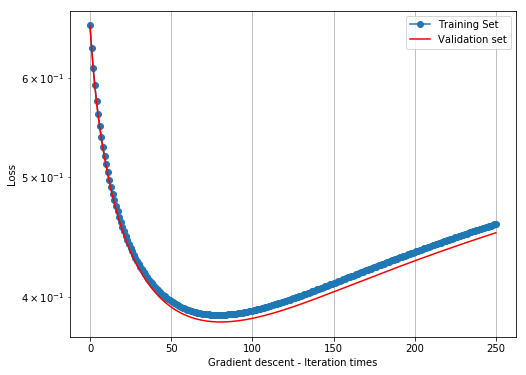

In [8]:
def AdaDelta_grad(X_train,y_train,w,cache,t):
    n=123
    gradient_aver=mat(zeros((n,1)))
    alpha=0.1
    decay_rate=0.9
    #eps=1e-8或eps=1e-9并不收敛
    eps=math.pow(10, -5 )
    #开始更新theta
    gradient_aver=get_gradient(X_train,y_train,w)/n
    for i in range(n):
			# print gradient_aver
            cache[i]=decay_rate*cache[i]+(1-decay_rate)*gradient_aver[i]*gradient_aver[i]
            #print("why1",t[i]+eps)
            #print("why2",cache[i]+eps)
            g_w=-(np.sqrt(t[i]+eps))*(1/np.sqrt(cache[i]+eps))*gradient_aver[i]
            w[i]+=g_w
            t[i]=decay_rate*t[i]+(1-decay_rate)*g_w*g_w
            #w[i] -= gradient_aver * aa
    return w,cache,t
AdaDalta_loss=[]
AdaDalta_cnt=0
def LR_AdaDelta(option):
    if (option==0):
        w = mat(zeros((n,1)))
    elif option == 1:
        w=mat(np.random.rand(n,1))
    else:
        w = mat(np.random.randn(n,1))
    cache=mat(zeros((n,1)))
    t=mat(zeros((n,1)))
    loss=0
    loss=computerloss(X_train,y_train,w)
    print("loss",loss)
    #初始化参数
    train_loss=[]
    test_loss=[]
    cnt=0
    while True:
        #n=123
        #w += nita*(-gradw(X_train,y_train)/n);
        w,cache,t=AdaDelta_grad(X_train,y_train,w,cache,t)
        #print("thete",theta.shape)
        newloss=computerloss(X_train,y_train,w)
        newtestloss=computerloss(X_test,y_test,w)
        if abs(loss - newloss) > 0.00001:
            loss = newloss
        train_loss.append(loss)
        test_loss.append(newtestloss)
        cnt += 1
# 当迭代次数大于150时也停止
        if cnt > 250:
            break
    #计算loss函数
    #testloss=computerloss(X_test,y_test,theta)
   # print("test_loss",X_train[1,:].type)
    print("newloss",newloss)
    print("newtestloss",newtestloss)
    %matplotlib inline
    plt.figure(figsize=(8, 6))
    plt.yscale('log')
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), test_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
    return test_loss,cnt
AdaDalta_loss,AdaDalta_cnt=LR_AdaDelta(0)

loss 0.69314718056
newloss 0.608643508196
newtestloss 0.60741173133


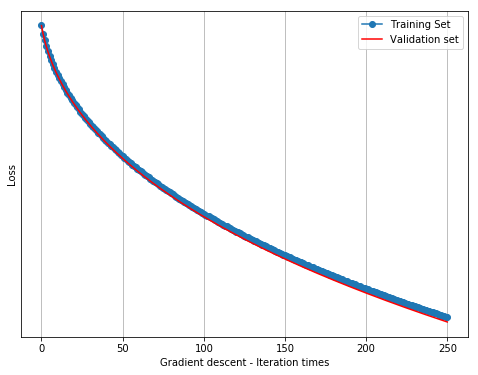

In [6]:
def Adam_grad(X_train,y_train,w,cache,mt,t):
    n=123
    alpha=0.001
    decay_rate=0.999
    bete=0.9
    #eps=1e-8或eps=1e-9并不收敛
    eps=math.pow(10, -8 )
    #print("eps",eps)
    #开始更新theta
    t+=1
    alpha=alpha/(np.sqrt(t))
    gradient_aver=mat(zeros((n,1)))
    gradient_aver=get_gradient(X_train,y_train,w)/n
    for i in range(n):
			# print gradient_aver
            mt[i]=bete*mt[i]+(1-bete)*gradient_aver[i]
            cache[i]=decay_rate*cache[i]+(1-decay_rate)*gradient_aver[i]*gradient_aver[i]
            g_w=alpha*(np.sqrt(1-math.pow(decay_rate,t)))*(1/(1-math.pow(bete,t)))
            w[i]-=g_w*mt[i]*(1/(np.sqrt(cache[i]+eps)))
    return w,cache,mt,t
Adam_loss=[]
Adam_cnt=0
def LR_Adam():
    w = mat(zeros((n,1)))
    cache=mat(zeros((n,1)))
    mt=mat(zeros((n,1)))
    t=0
    loss=0
    loss=computerloss(X_train,y_train,w)
    print("loss",loss)
    #初始化参数
   # maxIterations=150
    #print("thete",theta.shape)
    train_loss=[]
    test_loss=[]
    cnt=0
    while True:
        w,cache,mt,t=Adam_grad(X_train,y_train,w,cache,mt,t)
        #print("thete",theta.shape)
        newloss=computerloss(X_train,y_train,w)
        newtestloss=computerloss(X_test,y_test,w)
        if abs(loss - newloss) > 0.00001:
            loss = newloss
        train_loss.append(loss)
        test_loss.append(newtestloss)
        cnt += 1
# 当迭代次数大于150时也停止
        if cnt > 250:
            break
    #计算loss函数
    #testloss=computerloss(X_test,y_test,theta)
   # print("test_loss",X_train[1,:].type)
    %matplotlib inline
    print("newloss",newloss)
    print("newtestloss",newtestloss)
    plt.figure(figsize=(8, 6))
    plt.yscale('log')
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), test_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
    return test_loss,cnt
Adam_loss,Adam_cnt=LR_Adam()


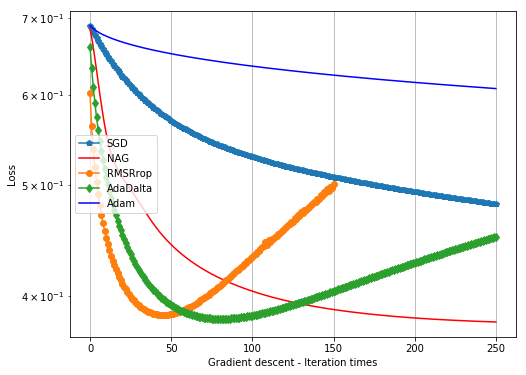

In [9]:
cnt=251
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.xlabel('Gradient descent - Iteration times')
plt.ylabel('Loss')
plt.plot(range(cnt), SGD_loss, 'p-', label=u"SGD")
plt.plot(range(NAG_cnt),NAG_loss, 'r-', label=u"NAG")
plt.plot(range(RMSProp_cnt),RMSProp_loss, 'o-', label=u"RMSRrop")
plt.plot(range(AdaDalta_cnt),AdaDalta_loss, 'd-', label=u"AdaDalta")
plt.plot(range(Adam_cnt),Adam_loss, 'b-', label=u"Adam")
plt.legend()
plt.grid()
plt.show()